In [1]:
#imports
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import calendar
import folium
from folium import plugins
from folium.plugins import HeatMap
import ipywidgets
import geocoder
import geopy

In [2]:
df_pay_totals = pd.read_excel('PayTotals.xlsx')

## Data Preprocessing

In [3]:
df_pay_totals.head()

,PayDate,PayTerms,PayTotal,PayCount
0,2015-09-24,Check,42.27,1
1,2015-09-24,Credit Card,243.84,1
2,2015-09-25,Credit Card,8.67,1
3,2015-09-26,Check,486.60,1
4,2015-09-26,Credit Card,1919.32,3


In [4]:
df_pay_totals.dtypes

PayDate     datetime64[ns]
PayTerms            object
PayTotal           float64
PayCount             int64
dtype: object

In [5]:
df_pay_totals.count()

PayDate     3770
PayTerms    3753
PayTotal    3770
PayCount    3770
dtype: int64

In [6]:
df_pay_totals.PayTerms.value_counts()

Credit Card        1690
Cash               1309
Check               635
Acct bal adjsmt      97
Refund to Acct       22
Name: PayTerms, dtype: int64

In [7]:
checks = df_pay_totals[df_pay_totals.PayTerms == 'Check']
checks.tail()

,PayDate,PayTerms,PayTotal,PayCount
3757,2020-08-07,Check,167.50,1
3760,2020-08-08,Check,2504.73,3
3763,2020-08-10,Check,1.67,1
3766,2020-08-11,Check,1750.00,1
3769,2020-08-12,Check,885.64,2


In [8]:
df_pay_totals.shape

(3770, 4)

In [9]:
nulls = df_pay_totals[df_pay_totals.PayTerms.isna() == True]
nulls

,PayDate,PayTerms,PayTotal,PayCount
339,2016-03-12,NaN,5.32,1
460,2016-05-12,NaN,397.77,1
494,2016-05-25,NaN,416.05,1
1492,2017-08-31,NaN,313.17,1
1679,2017-11-20,NaN,13.38,1
1867,2018-02-17,NaN,23.03,1
1895,2018-03-05,NaN,75.11,1
1915,2018-03-15,NaN,166.31,1
2107,2018-06-16,NaN,57.64,1
2176,2018-07-21,NaN,839.14,1


In [10]:
df_pay_totals.PayTotal.sum().round(2)

5059134.03

In [11]:
nulls.PayTotal.sum().round(2) 

4696.9

In [12]:
pay_types = df_pay_totals.groupby(['PayTerms']).sum().round(2)

In [13]:
pd.set_option('float_format', '{:.2f}'.format)

In [14]:
pay_types

,PayTotal,PayCount
PayTerms,,
Acct bal adjsmt,11063.90,140
Cash,389642.20,3043
Check,805670.65,911
Credit Card,3869357.55,10360
Refund to Acct,-21297.17,34


In [18]:
df_pay_totals.head()

,PayDate,PayTerms,PayTotal,PayCount
0,2015-09-24,Check,42.27,1
1,2015-09-24,Credit Card,243.84,1
2,2015-09-25,Credit Card,8.67,1
3,2015-09-26,Check,486.60,1
4,2015-09-26,Credit Card,1919.32,3


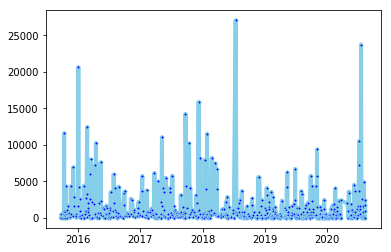

In [30]:
# multiple line plot
plt.plot( 'PayDate', 'PayTotal', data=df_pay_totals[df_pay_totals.PayTerms == 'Check'], marker='o', markerfacecolor='blue', markersize=3, color='skyblue', linewidth=4)
#plt.plot( 'PayDate', 'y2', data=df, marker='', color='olive', linewidth=2)
#plt.plot( 'PayDate', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

In [33]:
daily_pays = df_pay_totals.groupby(['PayDate']).sum()

In [35]:
daily_pays.head(10)

,PayTotal,PayCount
PayDate,,
2015-09-24,286.11,2
2015-09-25,8.67,1
2015-09-26,2566.32,7
2015-09-28,475.77,2
2015-09-29,152.82,7
2015-09-30,386.90,1
2015-10-01,2112.23,1
2015-10-02,459.52,8
2015-10-03,9806.67,28


In [38]:
from matplotlib import dates as mpl_dates

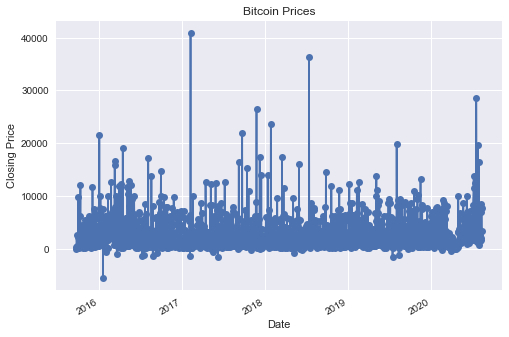

<Figure size 1440x864 with 0 Axes>

In [43]:
plt.style.use('seaborn')

sales_date = daily_pays.index
sales_total = daily_pays['PayTotal']

plt.plot_date(sales_date, sales_total, linestyle='solid')

plt.gcf().autofmt_xdate()

plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.figure(figsize=(20,12))
plt.show()

In [49]:
year1 = '2015-12-31'
year2 = '2016-12-31'
year3 = '2017-12-31'
year4 = '2018-12-31'
year5 = '2019-12-31'
year6 = '2020-12-31'

In [51]:
year1_sales = daily_pays[daily_pays.index <= year1]
year1_sales.tail()

,PayTotal,PayCount
PayDate,,
2015-12-20,1091.55,4
2015-12-21,6559.48,5
2015-12-22,2172.09,9
2015-12-23,4220.97,7
2015-12-24,524.11,4


In [52]:
year1_sales.shape

(88, 2)

In [53]:
year2_sales = daily_pays[(daily_pays.index <= year2) & (daily_pays.index > year1)]
year3_sales = daily_pays[(daily_pays.index <= year3) & (daily_pays.index > year2)]
year4_sales = daily_pays[(daily_pays.index <= year4) & (daily_pays.index > year3)]
year5_sales = daily_pays[(daily_pays.index <= year5) & (daily_pays.index > year4)]
year6_sales = daily_pays[(daily_pays.index <= year6) & (daily_pays.index > year5)]

In [60]:
year6_sales.head()

,PayTotal,PayCount
PayDate,,
2020-01-02,3715.76,6
2020-01-03,6185.03,11
2020-01-04,6972.21,17
2020-01-05,928.83,11
2020-01-06,5287.57,6


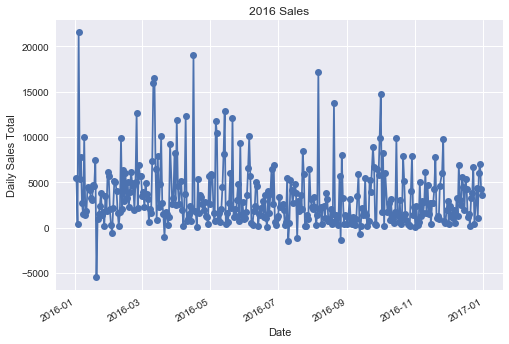

In [62]:
plt.style.use('seaborn')

sales_date = year2_sales.index
sales_total = year2_sales['PayTotal']

plt.plot_date(sales_date, sales_total, linestyle='solid')

plt.gcf().autofmt_xdate()

plt.title('2016 Sales')
plt.xlabel('Date')
plt.ylabel('Daily Sales Total')
plt.show()

In [70]:
grp = year2_sales[['PayTotal']]
grp2 = year3_sales[['PayTotal']]

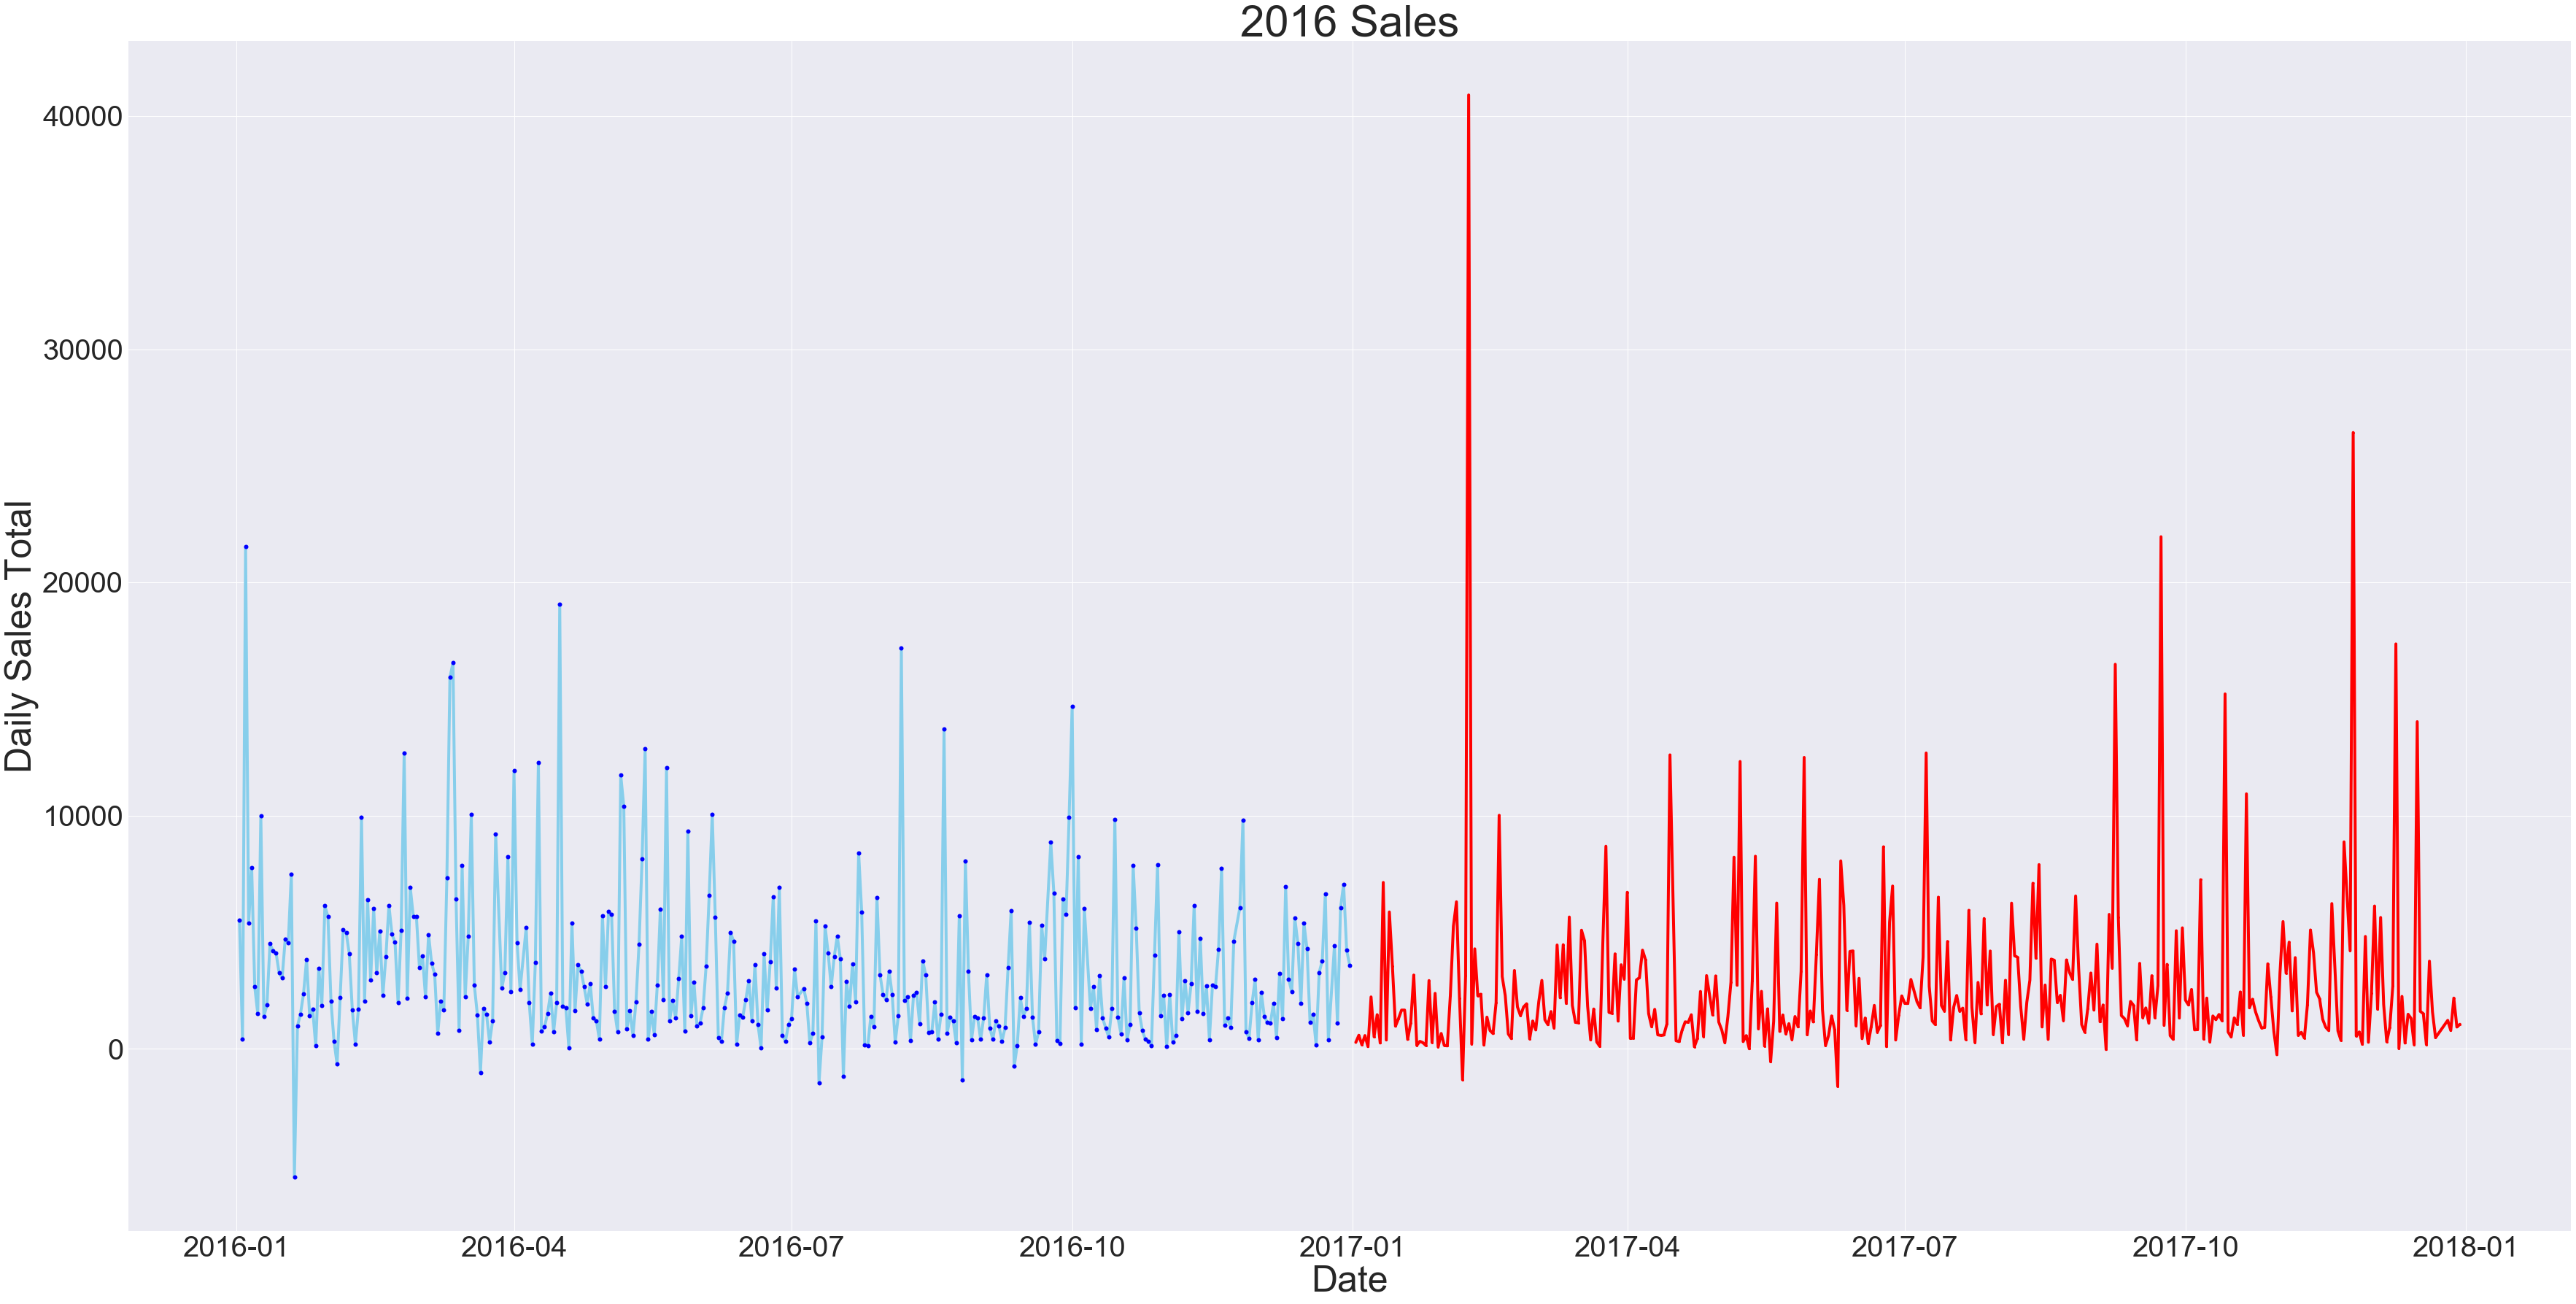

In [93]:
#grp.plot(kind = 'line', figsize=(50,20), color='purple')
plt.figure(figsize=(60,30))
plt.plot(grp.index, 'PayTotal', data=grp, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)
plt.plot(grp2.index, 'PayTotal', data=grp2, marker='o', markerfacecolor='red', markersize=3, color='red', linewidth=4)
plt.title('2016 Sales', fontsize=60)
plt.xlabel('Date', fontsize=50)
plt.ylabel('Daily Sales Total', fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()

In [94]:
year1_sales.head()

,PayTotal,PayCount
PayDate,,
2015-09-24,286.11,2
2015-09-25,8.67,1
2015-09-26,2566.32,7
2015-09-28,475.77,2
2015-09-29,152.82,7


In [108]:
year1_sales['Month-Day'] = pd.DatetimeIndex(year1_sales.index).month.astype(str) + '-' + pd.DatetimeIndex(year1_sales.index).day.astype(str)

/Users/zachcornelison/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
year1_sales.head()

,PayTotal,PayCount,Month,Month-Day
PayDate,,,,
2015-09-24,286.11,2,9-24,9-24
2015-09-25,8.67,1,9-25,9-25
2015-09-26,2566.32,7,9-26,9-26
2015-09-28,475.77,2,9-28,9-28
2015-09-29,152.82,7,9-29,9-29


In [111]:
year2_sales['Month-Day'] = pd.DatetimeIndex(year2_sales.index).month.astype(str) + '-' + pd.DatetimeIndex(year2_sales.index).day.astype(str)
year2_sales.head()

/Users/zachcornelison/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PayTotal,PayCount,Month-Day
PayDate,,,
2016-01-02,5524.86,18,1-2
2016-01-03,430.63,5,1-3
2016-01-04,21533.95,6,1-4
2016-01-05,5385.04,13,1-5
2016-01-06,7764.44,14,1-6


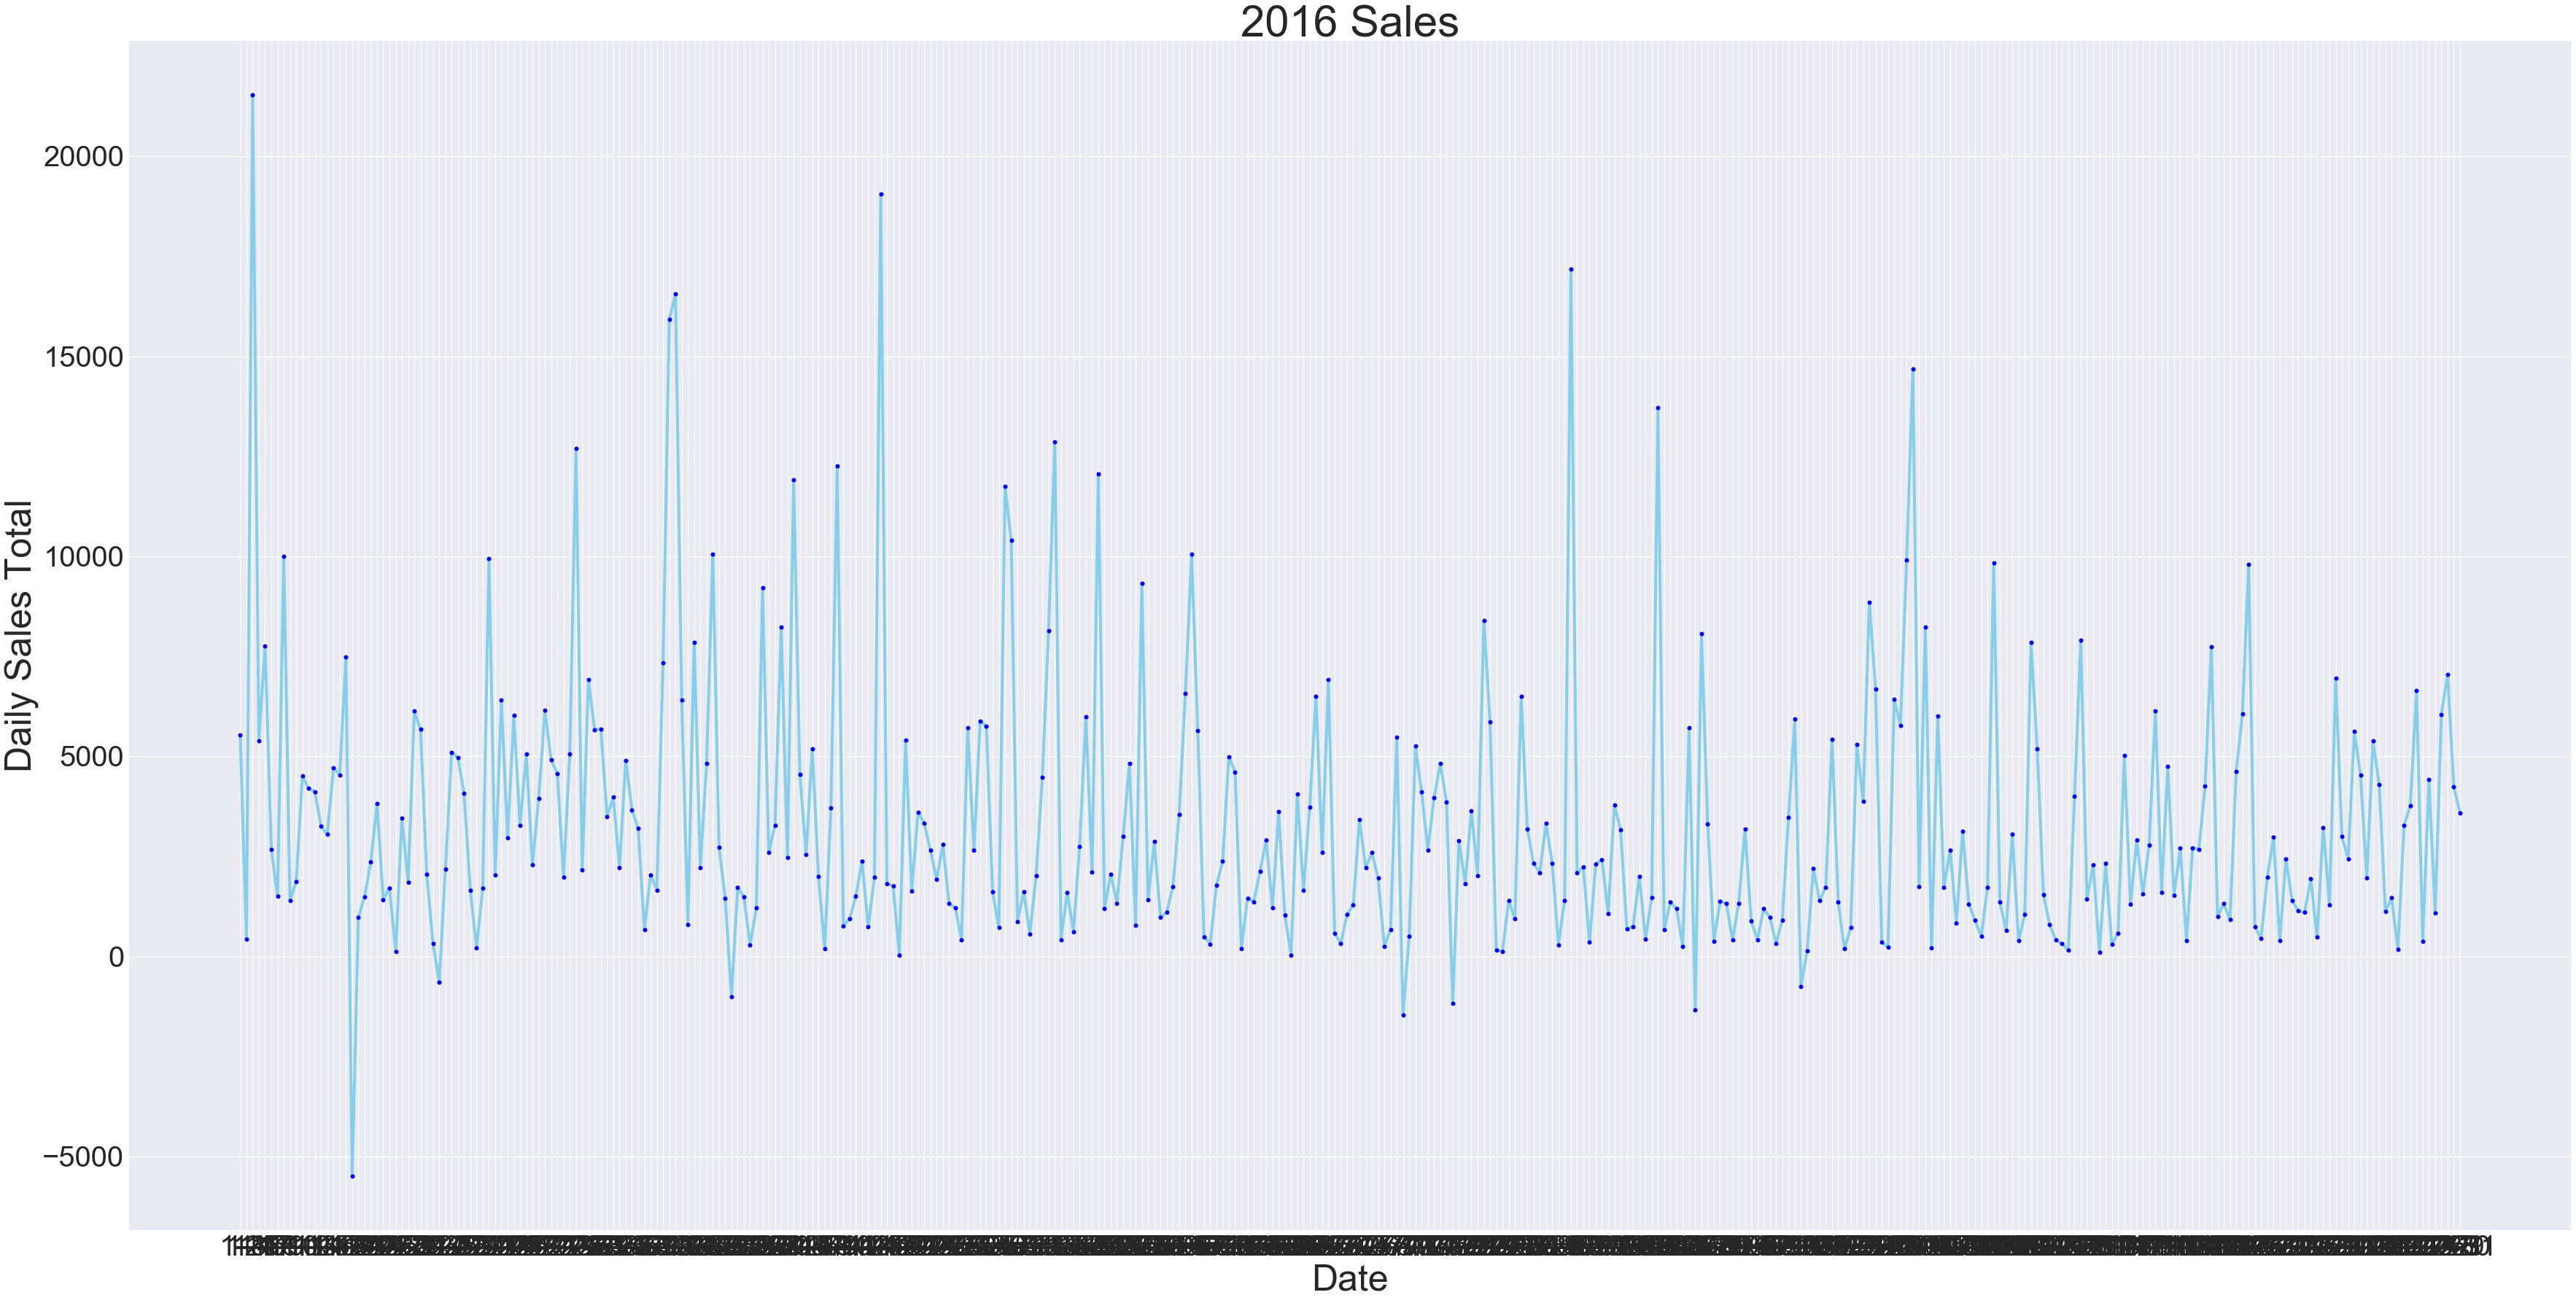

In [113]:
plt.figure(figsize=(60,30))
plt.plot('Month-Day', 'PayTotal', data=year2_sales, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)
plt.title('2016 Sales', fontsize=60)
plt.xlabel('Date', fontsize=50)
plt.ylabel('Daily Sales Total', fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()